#Funzioni di lettura/visualizzazione/salvataggio

In [ ]:
#Leggere i dati da un'immagine formato jpeg, tif, png
import skimage.io as io
x = io.imread('./Immagini/volto1.png')

In [ ]:
#Leggere i dati da un'file .y
import numpy as np
x = np.fromfile('./Immagini/house.y', dtype=np.uint8)
x = np.reshape(x, (512,512))

In [ ]:
#Visualizzare immagine 
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x, clim=[0,255], cmap='gray')

In [ ]:
#Visualizzare componenti RGB separate
import matplotlib.pyplot as plt
r=x[:,:,0]
g=x[:,:,1]
b=x[:,:,2]
plt.figure()
plt.subplot(1,3,1)
plt.title('Componente Red');plt.imshow(r, cmap='gray', clim=None)
plt.subplot(1,3,2)
plt.title('Componente Green');plt.imshow(g, cmap='gray', clim=None)
plt.subplot(1,3,3)
plt.title('Componente Blue');plt.imshow(b, cmap='gray', clim=None)

In [ ]:
#Ricomporre immagine a partite dalle componenti RGB
import numpy as np
y = np.stack((r,g,b), -1)

In [ ]:
#Visualizzare Istogramma
import matplotlib.pyplot as plt
plt.figure()
plt.hist(x.flatten(), bins=256)

In [ ]:
#Visualizzare bitplane del bit i-esimo (7 MSB - 0 LSB)
import sys
sys.path.append('./Librerie')  # Add the path to the custom library
import numpy as np
import bitop as bo 
x = bo.bitget(np.uint8(x),7)

In [ ]:
#Salvare immagine in jpeg
import skimage.io as io
io.imsave('immagine.jpg', x, quality=70) #fattore di compressione del 30%

In [ ]:
#Salvare immagine formato .y
np.uint8(x).tofile('immagine.y')

#Funzioni per generare artefatti

In [ ]:
#Aggiungere WGN ad un'immagine
import numpy as np
d=25
n = d*np.random.randn()
noisy = x + n

#Funzioni per Enhancement

In [ ]:
#Ottenere il Full Scale Histogram Stretch per una data immagine
import numpy as np
x_max = np.max(x); x_min = np.min(x);
x = 255 * (( x - x_min) / ( x_max - x_min))


In [ ]:
#Eliminare difetti isolati
import scipy.ndimage as ndi
k=10 #dim finestra
x = ndi.median_filter(x, (k,k))

In [ ]:
#Filtro gaussiano per ottenere effetto blurring
import scipy.ndimage as ndi
k=3 #varianza
x = ndi.gaussian_filter(x, (k,k))

#Funzionalità specifiche Python

Text(0, 0.5, 'ascisse')

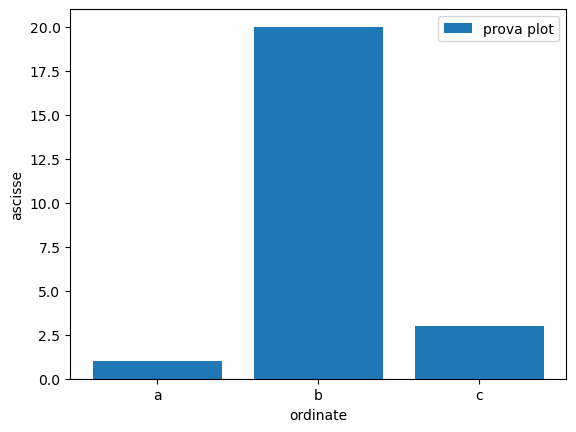

In [ ]:
#Mostrare dati su plot
import matplotlib.pyplot as plt
plt.figure()
plt.plot(['a','b', 'c'],[1,20,3], label='prova plot')
#plt.bar(['a','b', 'c'],[1,20,3], label='prova plot')
plt.legend()
plt.xlabel('ordinate')
plt.ylabel('ascisse')


In [ ]:
#Ciclo for con indice ed iterator
for idx,item in enumerate ([3,5,7]):
    print(f"Alla posizione {idx} troviamo valore {item}")

In [ ]:
#Definire una soglia data la percentuale di valori che non devono superarla
import numpy as np
T = np.percentile(x,70) #restituisce una soglia che limita il 70% degli elementi
print(T)

In [ ]:
#Trasformare Maschera 2D in 3D
h = np.ones((k,k))
H = np.expand_dims(h,-1)
print(H)

#Funzioni per il calcolo di dati

In [ ]:
#Calcolo dell'MSE
import numpy as np
y= x**2 #elaborazione specifica di x
mse = np.mean( (x - y)**2 )
print(mse)